### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [108]:
data = pd.read_csv('data/coupons.csv')

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [110]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


**2. Investigate the dataset for missing or problematic data.**

- Use summary statistics or data visualization to identify columns with missing values. Python libraries like Pandas provide functions like isnull() or info() to check for missing values. Python libraries like Pandas provide functions like isnull() or info() to check for missing values.co

In [111]:
# Identify missing values
missing_values = data.isnull().sum().sort_values()

# Display columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64


- Use heatmaps or bar charts to visualize missing data patterns. This can provide a quick overview of which columns have the most missing values.

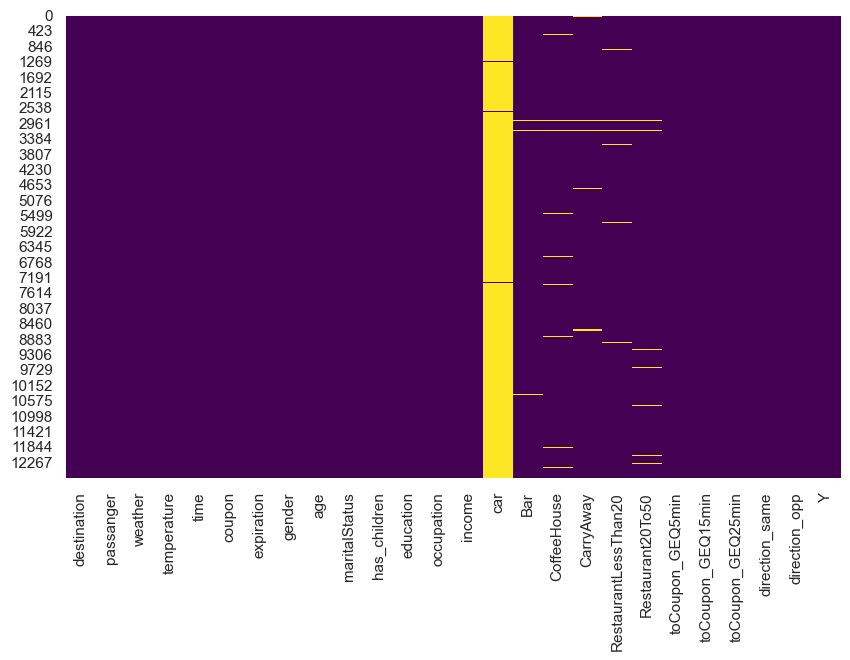

In [112]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.show()

**3. Decide what to do about your missing data for example ( drop, replace, other...)**

- Columns *expiration:* convert everything to hours. So, its type can be defined as a numerical.
- Columns *income:* replace all blank spaces sign "$", and "-" into " ". For definig the value in numerical type and I replace the income range into their averages.
- Columns *Bar, RestaurantLessThan20, Restaurant20To50, CoffeeHouse, CarryAway:* replace with a single value, using their average. So, in this way the type is a numerical.
- Clean *passenger* value from "()" characters.
- Normalize *expiration*: time from day to hours and delete 'h', convert in numerical value.
- Normalize *age* value for 50plus, below21 - convert in numerical value.
- Rename coupon values, normalize the name in according to data columns: *RestaurantLess20*, *Restaurant20to50*, *CarryAway*, *CoffeeHouse*.

In [113]:
# Assuming 'data' is our DataFrame
columns_to_process = ['RestaurantLessThan20', 'Restaurant20To50', 'Bar', 'CoffeeHouse', 'CarryAway']

# Now, perform the preprocessing define a function
def preprocess_columns(data, columns_to_process):
    replacement_mapping = {
        '4~8': 6,
        '1~3': 2,
        'never': 0,
        'less1': 1,
        'gt8': 9
    }

    for column in columns_to_process:
        data[column] = data[column].replace(replacement_mapping)

# Apply the replace
preprocess_columns(data, columns_to_process)

# Convert columns to numeric type
data[columns_to_process] = data[columns_to_process].apply(pd.to_numeric, errors='coerce')

# Replace NaN values with 0 in the specified columns
data[columns_to_process] = data[columns_to_process].fillna(0)

In [114]:
# Clean income value from $, -, " " characters
data["income"] = data["income"].str.replace("[$ \-\ ]", "", regex=True)

# Create a dictionary to map income range values to averages
income_mapping = {
    '2500037499': 31250,
    '1250024999': 18750,
    '3750049999': 43750,
    '100000orMore': 100000,
    '5000062499': 56250,
    'Lessthan12500': 12499,
    '8750099999': 93750,
    '7500087499': 81250,
    '6250074999': 68750
}

# Replace income range values with numerical averages
data["income"] = data["income"].replace(income_mapping).astype(float)
print(data["income"])

0        43750.0
1        43750.0
2        43750.0
3        43750.0
4        43750.0
          ...   
12679    81250.0
12680    81250.0
12681    81250.0
12682    81250.0
12683    81250.0
Name: income, Length: 12684, dtype: float64


In [115]:
## Clean passenger value from "()" characters 
data['passanger'] = data['passanger'].str.replace('(', '')
data['passanger'] = data['passanger'].str.replace(')', '')

## Normalize expiration the time from day to hours and delete 'h', convert in numerical value
data["expiration"]=data["expiration"].str.replace("1d","24")
data["expiration"]=data["expiration"].str.replace("2h","2")
data["expiration"]=pd.to_numeric(data["expiration"])

## Normalize age value for 50plus, below21 - convert in numerical value
data["age"]=data["age"].str.replace("50plus","51")
data["age"]=data["age"].str.replace("below21","20")
data["age"]=pd.to_numeric(data["age"])

## Rename coupon values, normalize the name in according to data columns: RestaurantLess20, Restaurant20to50, CarryAway, CoffeeHouse
data['coupon'] = data['coupon'].str.replace('Restaurant(<20)', 'RestaurantLess20')
data['coupon'] = data['coupon'].str.replace('Restaurant(20-50)', 'Restaurant20to50')
data['coupon'] = data['coupon'].str.replace('Carry out & Take away', 'CarryAway')
data['coupon'] = data['coupon'].str.replace('Coffee House', 'CoffeeHouse')

In [116]:
### Rename columns
data.rename(columns = {'Y':'acceptance'}, inplace = True)
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,acceptance
0,No Urgent Place,Alone,Sunny,55,2PM,RestaurantLess20,24,Female,21,Unmarried partner,...,0.0,0.0,6.0,2.0,1,0,0,0,1,1
1,No Urgent Place,Friends,Sunny,80,10AM,CoffeeHouse,2,Female,21,Unmarried partner,...,0.0,0.0,6.0,2.0,1,0,0,0,1,0
2,No Urgent Place,Friends,Sunny,80,10AM,CarryAway,2,Female,21,Unmarried partner,...,0.0,0.0,6.0,2.0,1,1,0,0,1,1
3,No Urgent Place,Friends,Sunny,80,2PM,CoffeeHouse,2,Female,21,Unmarried partner,...,0.0,0.0,6.0,2.0,1,1,0,0,1,0
4,No Urgent Place,Friends,Sunny,80,2PM,CoffeeHouse,24,Female,21,Unmarried partner,...,0.0,0.0,6.0,2.0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,CarryAway,24,Male,26,Single,...,0.0,2.0,6.0,2.0,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,CarryAway,24,Male,26,Single,...,0.0,2.0,6.0,2.0,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,CoffeeHouse,24,Male,26,Single,...,0.0,2.0,6.0,2.0,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,24,Male,26,Single,...,0.0,2.0,6.0,2.0,1,1,1,0,1,0


4. What proportion of the total observations chose to accept the coupon? 



In [117]:
# Assuming 'data' is your DataFrame with 'acceptance' column

# Calculate the proportion of accepted coupons in the entire DataFrame
total_proportion_accepted = data['acceptance'].value_counts(normalize=True).get(1, 0)
# Visualize % of total observations accepting the coupon
print(f"Proportion of total observations accepting the coupon: {total_proportion_accepted:.2%}")

Proportion of total observations accepting the coupon: 56.84%


5. Use a bar plot to visualize the coupon column.

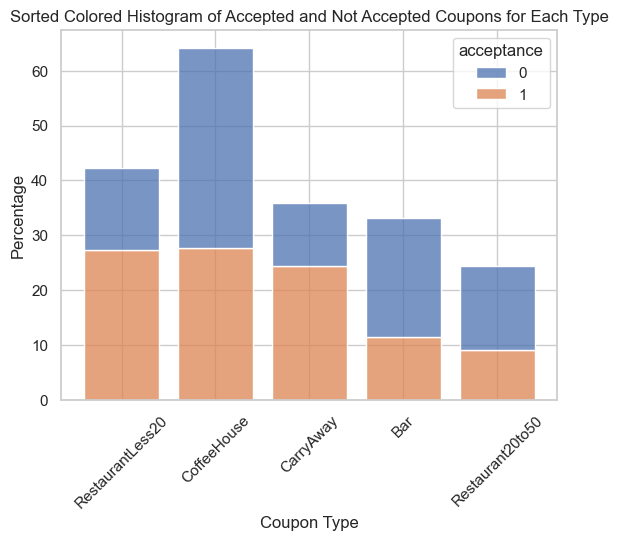

In [118]:
# Calculate the percentage of each 'acceptance' value within each 'coupon_type'
percentage_data = data.groupby(['coupon', 'acceptance']).size() / data.groupby('coupon').size() * 100
percentage_data = percentage_data.reset_index(name='percentage')

# Order coupon types by count
ordered_coupon_types = percentage_data.groupby('coupon')['percentage'].mean().sort_values(ascending=False).index

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create a colored histogram with sorted coupon types and acceptance values
g = sns.histplot(data=data, x='coupon', hue='acceptance', multiple='stack', shrink=0.8,stat='percent', common_norm=False)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Coupon Type')
plt.ylabel('Percentage')
plt.title('Sorted Colored Histogram of Accepted and Not Accepted Coupons for Each Type')

# Show the plot
plt.show()

6. Use a histogram to visualize the temperature column.

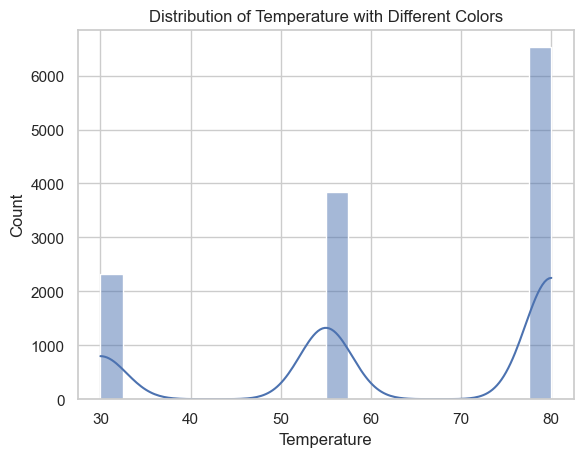

In [119]:
# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create a histogram for the 'temperature' column with default color scheme
sns.histplot(data=data, x='temperature', bins=20, kde=True)

# Add labels and title
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Distribution of Temperature with Different Colors')

# Show the plot
plt.show()

In this version, I've added vertical dashed lines at the mean positions of 'temperature' for each weather state (sunny, rainy, snowy). You can customize the linestyle, color, and label according to your preferences.

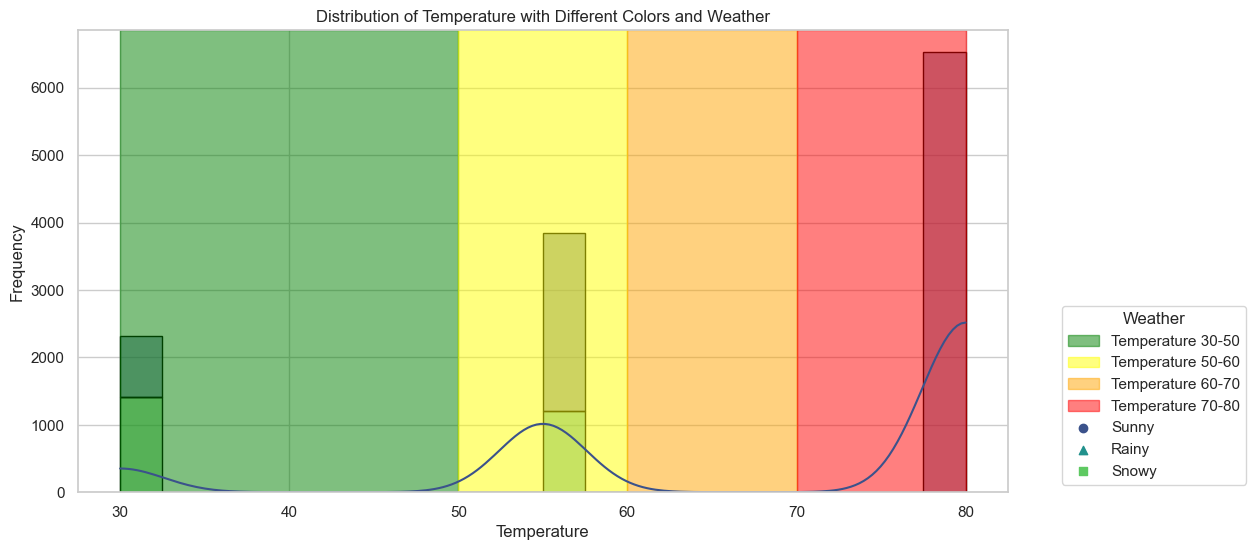

In [120]:
# Assume 'data' is your DataFrame
temperature_intervals = [(0, 30), (30, 50), (50, 60), (60, 70), (70, 80), (80, 90), (90, 100)]
colors = ['blue', 'green', 'yellow', 'orange', 'red']

# Create a single histogram with different colors for temperature intervals and 'weather' as hue
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='temperature', bins=20, kde=True, hue='weather', palette='viridis', multiple='stack', edgecolor='black')

# Iterate over temperature intervals and colors to create different colored bins
for interval, color in zip(temperature_intervals[1:], colors[1:]):
    plt.axvspan(interval[0], interval[1], color=color, alpha=0.5, label=f'Temperature {interval[0]}-{interval[1]}')

# Adding labels and title
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature with Different Colors and Weather')

# Display the legend with a better title
legend = plt.legend(title='Temperature Intervals', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding custom markers for the weather legend
weather_markers = {'Sunny': 'o', 'Rainy': '^', 'Snowy': 's'}

for i, (weather_category, color) in enumerate(zip(data['weather'].unique(), sns.color_palette('viridis', n_colors=len(data['weather'].unique())))):
    plt.scatter([], [], color=color, label=weather_category, marker=weather_markers.get(weather_category, 'o'))

# Display the combined legend
plt.legend(title='Weather', bbox_to_anchor=(1.05, 0), loc='lower left')

# Display the plot
plt.show()

In the next version, I've used a scatter plot where each point represents a combination of 'temperature' and 'weather'. Vertical dashed lines are still used to represent temperature intervals, and horizontal dashed lines represent the mean positions for each weather state. Adjust the marker style, size (s parameter), and other plot elements according to your preferences.

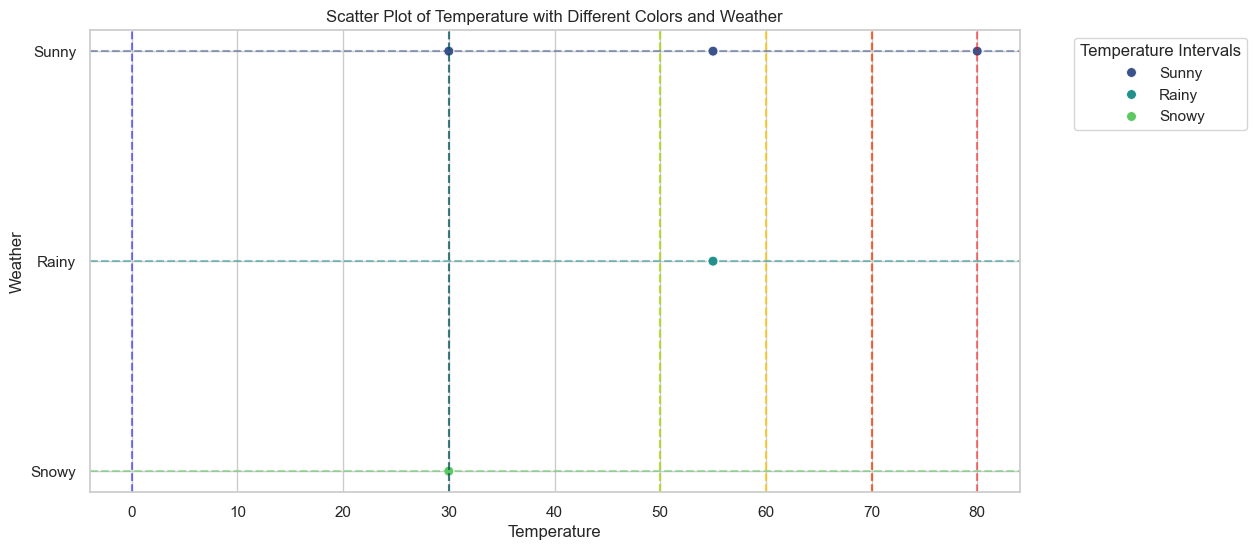

In [121]:
# Assume 'data' is your DataFrame
temperature_intervals = [(0, 30), (30, 50), (50, 60), (60, 70), (70, 80), (80, 90), (90, 100)]
colors = ['blue', 'green', 'yellow', 'orange', 'red']

# Create a scatter plot with different colors for temperature intervals and 'weather' as hue
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='temperature', y='weather', hue='weather', palette='viridis', marker='o', s=50)

# Iterate over temperature intervals and colors to create different colored markers
for interval, color in zip(temperature_intervals, colors):
    plt.axvline(interval[0], color=color, linestyle='--', alpha=0.5)
    plt.axvline(interval[1], color=color, linestyle='--', alpha=0.5)

# Adding labels and title
plt.xlabel('Temperature')
plt.ylabel('Weather')
plt.title('Scatter Plot of Temperature with Different Colors and Weather')

# Display the legend with a better title
plt.legend(title='Temperature Intervals', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding horizontal lines for each weather state
for i, (weather_category, color) in enumerate(zip(data['weather'].unique(), sns.color_palette('viridis', n_colors=len(data['weather'].unique())))):
    plt.axhline(i, color=color, linestyle='--', label=f'{weather_category} Mean', alpha=0.5)

# Display the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [122]:
# Assume 'data' is your original DataFrame
bar_coupons_df = data[data['coupon'] == 'Bar'].copy()
# Display the new DataFrame
print(bar_coupons_df.head())

# Assuming 'data' is your original DataFrame

# Create a new DataFrame with only 'Bar' coupons
bar_coupons_df = data[data['coupon'] == 'Bar'].copy()

# Display the new DataFrame
print(bar_coupons_df.head())

        destination passanger weather  temperature  time coupon  expiration  \
9   No Urgent Place      Kids   Sunny           80  10AM    Bar          24   
13             Home     Alone   Sunny           55   6PM    Bar          24   
17             Work     Alone   Sunny           55   7AM    Bar          24   
24  No Urgent Place   Friends   Sunny           80  10AM    Bar          24   
35             Home     Alone   Sunny           55   6PM    Bar          24   

    gender  age      maritalStatus  ...  CoffeeHouse CarryAway  \
9   Female   21  Unmarried partner  ...          0.0       0.0   
13  Female   21  Unmarried partner  ...          0.0       0.0   
17  Female   21  Unmarried partner  ...          0.0       0.0   
24    Male   21             Single  ...          1.0       6.0   
35    Male   21             Single  ...          1.0       6.0   

   RestaurantLessThan20  Restaurant20To50 toCoupon_GEQ5min  toCoupon_GEQ15min  \
9                   6.0               2.0      

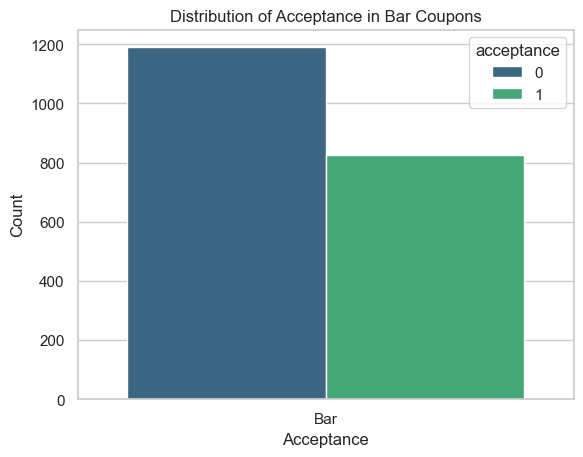

In [123]:
# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create a bar plot to visualize the distribution of acceptance values in 'Bar' coupons
sns.countplot(x='coupon', data=bar_coupons_df, palette='viridis', hue='acceptance',legend=True)

# Add labels and title
plt.xlabel('Acceptance')
plt.ylabel('Count')
plt.title('Distribution of Acceptance in Bar Coupons')

# Show the plot
plt.show()

2. What proportion of bar coupons were accepted?


In [124]:
# Assuming 'bar_coupons_df' is your new DataFrame with only 'Bar' coupons

# Calculate the proportion of accepted 'Bar' coupons
proportion_accepted = (bar_coupons_df['acceptance'].sum() / len(bar_coupons_df)) * 100

# Print the result
print(f"The proportion of accepted Bar coupons: {proportion_accepted:.2f}%")

The proportion of accepted Bar coupons: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [125]:
# Assuming 'bar_coupons_df' is your new DataFrame with only 'Bar' coupons

# Create subsets based on the frequency of bar visits
less_than_or_equal_3 = bar_coupons_df[bar_coupons_df['Bar'] <= 3]
more_than_3 = bar_coupons_df[bar_coupons_df['Bar'] > 3]

# Calculate acceptance rates for each subset
acceptance_rate_less_than_or_equal_3 = less_than_or_equal_3['acceptance'].mean() * 100
acceptance_rate_more_than_3 = more_than_3['acceptance'].mean() * 100

# Print the results
print(f"Acceptance rate for those who went to a bar 3 or fewer times a month: {acceptance_rate_less_than_or_equal_3:.2f}%")
print(f"Acceptance rate for those who went to a bar more than 3 times a month: {acceptance_rate_more_than_3:.2f}%")

Acceptance rate for those who went to a bar 3 or fewer times a month: 37.07%
Acceptance rate for those who went to a bar more than 3 times a month: 76.88%


In [126]:
# Assuming 'data' is our DataFrame
columns_to_process = ['Bar']

# Now, perform the preprocessing define a function
def preprocess_columns(bar_coupons_df, columns_to_process):
    replacement_mapping = {
        '4~8': 6,
        '1~3': 2,
        'never': 0,
        'less1': 1,
        'gt8': 9
    }

    for column in columns_to_process:
        bar_coupons_df[column] = bar_coupons_df[column].replace(replacement_mapping)

# Apply the replace
preprocess_columns(bar_coupons_df, columns_to_process)

# Convert columns to numeric type
bar_coupons_df[columns_to_process] = bar_coupons_df[columns_to_process].apply(pd.to_numeric, errors='coerce')

# Replace NaN values with 0 in the specified columns
bar_coupons_df[columns_to_process] = bar_coupons_df[columns_to_process].fillna(0)

In [127]:
print(data["Bar"]>50)

0        False
1        False
2        False
3        False
4        False
         ...  
12679    False
12680    False
12681    False
12682    False
12683    False
Name: Bar, Length: 12684, dtype: bool


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?
    - It looks like your code is attempting to convert the 'Bar' column to a numeric type, replace NaN values with 0, create a subset based on specific criteria, and then calculate the acceptance rate for that subset using a function.

In [128]:
# Assuming 'data' is our DataFrame
columns_to_process = ['Bar']
# Convert columns to numeric type
data[columns_to_process] = data[columns_to_process].apply(pd.to_numeric, errors='coerce')

# Replace NaN values with 0 in the specified columns
data[columns_to_process] = data[columns_to_process].fillna(0)

# Define a function for calculate_eligible_drivers_percentage
def calculate_eligible_drivers_percentage(data):
    """
    Calculate the percentage of drivers who go to bars more than once a month, are over 25 years old, and have a positive outcome 'Y'.
    
    Parameters:
    - data (pd.DataFrame): The input DataFrame containing relevant columns.

    Returns:
    - float: The calculated percentage of eligible drivers.
    """
    eligible_drivers_query = "(Bar > 1) & (age > 25) & (acceptance == 1)"
    eligible_drivers_count = data.query(eligible_drivers_query)["Bar"].dropna().count()
    total_drivers_count = len(data["Bar"].dropna())
    eligible_drivers_percentage = (eligible_drivers_count / total_drivers_count) * 100

    return eligible_drivers_percentage

# Example usage:
# Assuming 'data' is your DataFrame
result = calculate_eligible_drivers_percentage(data)
print(f"The percentage of eligible drivers is approximately: {result:.2f}%")

The percentage of eligible drivers is approximately: 13.61%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
    - It looks like our code is attempting to convert the 'has_children' column to a numeric type, replace NaN values with 0, create a subset based on specific criteria, and then calculate the acceptance rate for that subset using a function.

In [129]:
# Assuming 'data' is our DataFrame
columns_to_process = ['has_children','Bar']

# Convert columns to numeric type
data[columns_to_process] = data[columns_to_process].apply(pd.to_numeric, errors='coerce')

# Replace NaN values with 0 in the specified columns
data[columns_to_process] = data[columns_to_process].fillna(0)

# Define function compare_acceptance_rate
def compare_acceptance_rate(data):
    """
    Compare the acceptance rate between drivers who go to bars more than once a month, had passengers that were not kids,
    and had occupations other than 'Farming Fishing & Forestry'.

    Parameters:
    - data (pd.DataFrame): The input DataFrame containing relevant columns.

    Returns:
    - float: The acceptance rate for eligible drivers.
    - float: The acceptance rate for all others.
    """
    eligible_drivers_query = "(Bar > 1) & (has_children == 0) & (~occupation.isin(['Farming Fishing & Forestry']))"
    others_query = "(~(Bar > 1) | (has_children != 0) | occupation.isin(['Farming Fishing & Forestry']))"

    eligible_drivers_rate = data.query(eligible_drivers_query)["acceptance"].mean() * 100
    others_rate = data.query(others_query)["acceptance"].mean() * 100

    return eligible_drivers_rate, others_rate

# Assuming 'data' is our DataFrame
eligible_rate, others_rate = compare_acceptance_rate(data)
print(f"Acceptance rate for eligible drivers: {eligible_rate:.2f}%")
print(f"Acceptance rate for all others: {others_rate:.2f}%")

Acceptance rate for eligible drivers: 61.72%
Acceptance rate for all others: 55.47%


In [130]:
print(data['maritalStatus'])
print(data['Bar'])
print(data['has_children'])
print(data['income'])
print(data['RestaurantLessThan20'])

0        Unmarried partner
1        Unmarried partner
2        Unmarried partner
3        Unmarried partner
4        Unmarried partner
               ...        
12679               Single
12680               Single
12681               Single
12682               Single
12683               Single
Name: maritalStatus, Length: 12684, dtype: object
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12679    0.0
12680    0.0
12681    0.0
12682    0.0
12683    0.0
Name: Bar, Length: 12684, dtype: float64
0        1
1        1
2        1
3        1
4        1
        ..
12679    0
12680    0
12681    0
12682    0
12683    0
Name: has_children, Length: 12684, dtype: int64
0        43750.0
1        43750.0
2        43750.0
3        43750.0
4        43750.0
          ...   
12679    81250.0
12680    81250.0
12681    81250.0
12682    81250.0
12683    81250.0
Name: income, Length: 12684, dtype: float64
0        6.0
1        6.0
2        6.0
3        6.0
4        6.0
    

6. Compare the acceptance rates between those drivers who:

- **Criteria #1:** go to bars more than once a month, had passengers that were not a kid, and were not widowed
- **Criteria #2:** go to bars more than once a month and are under the age of 30
- **Criteria #3:** go to cheap restaurants more than 4 times a month and income is less than 50K.

In [131]:
# Assuming 'data' is our DataFrame
data
columns_to_process = ['has_children', 'Bar', 'RestaurantLessThan20', 'income']

# Convert columns to numeric type
data[columns_to_process] = data[columns_to_process].apply(pd.to_numeric, errors='coerce')

# Replace NaN values with 0 in the specified columns
data[columns_to_process] = data[columns_to_process].fillna(0)

def compare_acceptance_rates(data):
    """
    Compare the acceptance rates between different groups of drivers based on specific criteria.
    
    Parameters:
    - data (pd.DataFrame): The input DataFrame containing relevant columns.

    Returns:
    - float: Acceptance rate for drivers who go to bars more than once a month, had passengers that were not kids, and were not widowed.
    - float: Acceptance rate for drivers who go to bars more than once a month and are under the age of 30.
    - float: Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and have income less than 50K.
    """
    # Criteria 1
    criteria1_query = "(has_children == 0) & (Bar > 1) & (maritalStatus != 'Widowed')"
    acceptance_rate_criteria1 = data.query(criteria1_query)["acceptance"].mean() * 100

    # Criteria 2
    criteria2_query = "(Bar > 1) & (age < 30)"
    acceptance_rate_criteria2 = data.query(criteria2_query)["acceptance"].mean() * 100

    # Criteria 3
    criteria3_query = "(RestaurantLessThan20 > 4) & (income < 50000)"
    acceptance_rate_criteria3 = data.query(criteria3_query)["acceptance"].mean() * 100

    return acceptance_rate_criteria1, acceptance_rate_criteria2, acceptance_rate_criteria3

# Apply the function to data
# Example usage:
# Assuming 'data' is your DataFrame
rate1, rate2, rate3 = compare_acceptance_rates(data)
print(f"Acceptance rate for drivers with criteria 1: {rate1:.2f}%")
print(f"Acceptance rate for drivers with criteria 2: {rate2:.2f}%")
print(f"Acceptance rate for drivers with criteria 3: {rate3:.2f}%")


Acceptance rate for drivers with criteria 1: 61.72%
Acceptance rate for drivers with criteria 2: 62.81%
Acceptance rate for drivers with criteria 3: 60.07%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [132]:
def calculate_chi2_p_value(chi2_stat, degrees_of_freedom):
    """
    Calculate the p-value using the chi-square distribution.

    Parameters:
    - chi2_stat (float): The chi-square statistic.
    - degrees_of_freedom (int): Degrees of freedom.

    Returns:
    - float: The p-value.
    """
    return 1 - np.sum(np.random.chisquare(degrees_of_freedom, size=1000000) >= chi2_stat) / 1000000

# Example usage:
# Assuming you have calculated chi2_stat and degrees_of_freedom
# Replace these values with your actual chi-square statistic and degrees of freedom
chi2_stat = 10.0
degrees_of_freedom = 3

# Calculate p-value using the function
p_value = calculate_chi2_p_value(chi2_stat, degrees_of_freedom)
print(p_value)

0.981417


In [133]:
# Define function for chi_square_test using numpy libraries
def chi_square_test(data, column1, column2, target_column, alpha=0.05):
    """
    Perform a chi-square test of independence.

    Parameters:
    - data (pd.DataFrame): The input DataFrame.
    - column1 (str): The name of the first categorical column.
    - column2 (str): The name of the second categorical column.
    - target_column (str): The name of the target categorical column for which acceptance rates are measured.
    - alpha (float): The significance level (default is 0.05).

    Returns:
    - bool: True if the null hypothesis is rejected, indicating a significant association.
    """
    # Create a contingency table
    contingency_table = pd.crosstab(index=data[column1], columns=data[column2], values=data[target_column], aggfunc='mean')

    # Calculate the chi-square statistic manually
    observed_values = contingency_table.to_numpy()
    chi2_stat = np.sum((observed_values - np.mean(observed_values))**2 / np.mean(observed_values))

    # Degrees of freedom
    degrees_of_freedom = (observed_values.shape[0] - 1) * (observed_values.shape[1] - 1)

    # Calculate p-value using function chi-square distribution
    p_value = 1 - calculate_chi2_p_value(chi2_stat, degrees_of_freedom)

    # Check if the p-value is less than alpha
    return p_value < alpha

- Apply chi_square_test to "data"

In [134]:
# Assuming 'data' is your DataFrame
result = chi_square_test(data, 'age', 'Bar', 'acceptance')

if result:
    print("Reject the null hypothesis. There is a significant association between age, bar visits, and acceptance of bar coupons.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between age, bar visits, and acceptance of bar coupons.")

Reject the null hypothesis. There is a significant association between age, bar visits, and acceptance of bar coupons.


This code uses the pd.crosstab function to create a contingency table, where the rows represent whether the driver is over the age of 25 (age > 25), the columns represent whether the driver goes to bars more than once a month (Bar > 1), and the values are the counts of acceptance (acceptance). The resulting table provides a frequency distribution of these variables.

Adjust the column names according to your actual dataset. The frequency distribution will help you visualize the counts of different combinations of age, bar visits, and acceptance of bar coupons, which may further support or illustrate the observed associations.

In [135]:
# Assuming 'data' is your DataFrame
# Create a new columns based on the condition
data['is_over_25'] = data['age'] > 25
data['is_over_1'] = data['Bar'] > 1

contingency_table = pd.crosstab(index=data['is_over_25'], columns=data['is_over_1'], values=data['acceptance'], aggfunc='count')

# Print the frequency distribution
print("Frequency Distribution:")
print(contingency_table)

Frequency Distribution:
is_over_1   False  True 
is_over_25              
False        2079   1121
True         6707   2777


To visualize the hypothesis distribution, you can create a bar plot or heatmap of the contingency table. Here's an example using Python with matplotlib and seaborn:

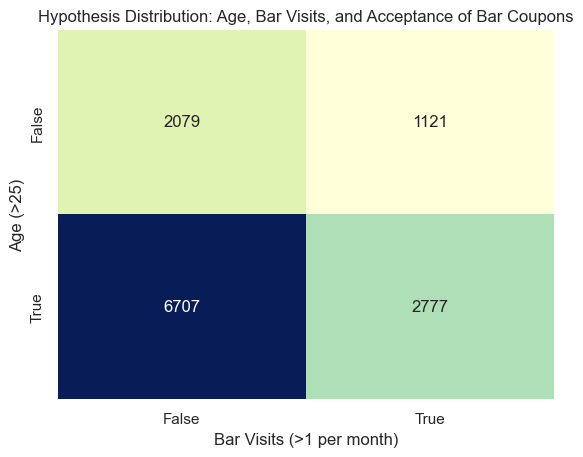

In [136]:
# Assuming 'data' is your DataFrame
# Create a new columns based on the condition
data['is_over_25'] = data['age'] > 25
data['is_over_1'] = data['Bar'] > 1

# Create a contingency table
contingency_table = pd.crosstab(index=data['is_over_25'], columns=data['is_over_1'], values=data['acceptance'], aggfunc='count')

# Create a bar plot or heatmap
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d", cbar=False)
plt.xlabel('Bar Visits (>1 per month)')
plt.ylabel('Age (>25)')
plt.title('Hypothesis Distribution: Age, Bar Visits, and Acceptance of Bar Coupons')
plt.show()

In this example, I've assumed that 'Bar' is the column indicating bar visits, and I've used it directly in the contingency table. Adjust the column names based on your actual dataset. If you encounter further issues or have specific column names, please provide more details about your dataset so that I can assist you more accurately.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In this independent investigation, let's explore the characteristics of passengers who accept coupons in a general sense, without focusing on a specific coupon group. We'll use visualizations and probability distributions to gain insights. Here's a step-by-step guide:

**Step 1:** Data Exploration and Cleaning
Start by exploring the dataset to understand the available columns and data types. Ensure that the relevant columns for coupon acceptance are numeric, and clean the data if needed.

In [137]:
# Explore the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Clean data if needed
# (e.g., convert categorical variables to numeric, handle missing values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12684 non-null  object 
 1   passanger             12684 non-null  object 
 2   weather               12684 non-null  object 
 3   temperature           12684 non-null  int64  
 4   time                  12684 non-null  object 
 5   coupon                12684 non-null  object 
 6   expiration            12684 non-null  int64  
 7   gender                12684 non-null  object 
 8   age                   12684 non-null  int64  
 9   maritalStatus         12684 non-null  object 
 10  has_children          12684 non-null  int64  
 11  education             12684 non-null  object 
 12  occupation            12684 non-null  object 
 13  income                12684 non-null  float64
 14  car                   108 non-null    object 
 15  Bar                

**Step 2:** Descriptive Statistics
Compute descriptive statistics to get an overview of the data. This includes mean, median, standard deviation, etc.

In [138]:
# Descriptive statistics
print(data.describe())

        temperature    expiration           age  has_children         income  \
count  12684.000000  12684.000000  12684.000000  12684.000000   12684.000000   
mean      63.301798     14.299117     32.437480      0.414144   52652.866446   
std       19.154486     10.923447     10.435134      0.492593   29709.413023   
min       30.000000      2.000000     20.000000      0.000000   12499.000000   
25%       55.000000      2.000000     21.000000      0.000000   31250.000000   
50%       80.000000     24.000000     31.000000      0.000000   43750.000000   
75%       80.000000     24.000000     41.000000      1.000000   81250.000000   
max       80.000000     24.000000     51.000000      1.000000  100000.000000   

                Bar   CoffeeHouse     CarryAway  RestaurantLessThan20  \
count  12684.000000  12684.000000  12684.000000          12684.000000   
mean       1.421082      2.407600      4.028225              3.617944   
std        2.077957      2.765176      2.767330             

**Step 3:** Visualization
Create visualizations to explore the characteristics of passengers who accept coupons. Use histograms, box plots, and other visualizations to compare distributions between acceptance and non-acceptance groups.

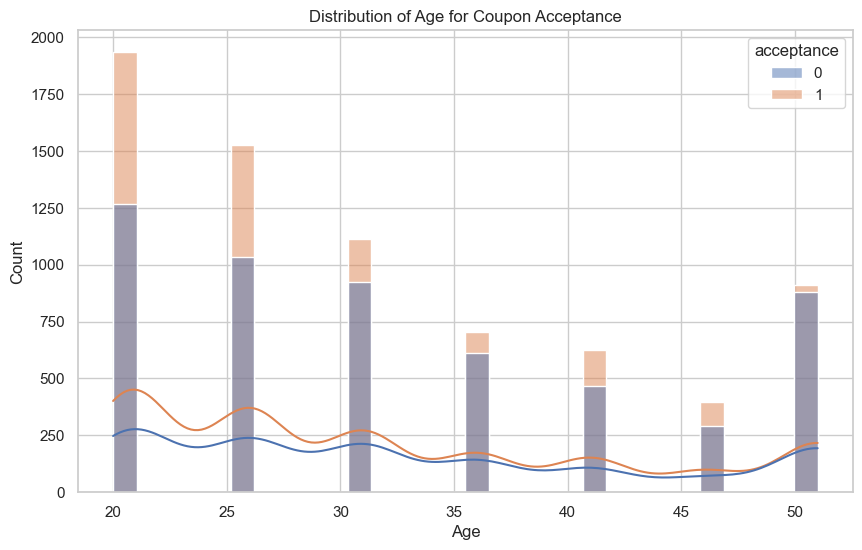

In [139]:
# Example: Histogram of Age for acceptance and non-acceptance groups
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='acceptance', bins=30, kde=True)
plt.title('Distribution of Age for Coupon Acceptance')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Step 4:** Probability Distributions
Explore probability distributions, such as the distribution of acceptance rates across different subgroups (e.g., age groups, income levels, etc.).

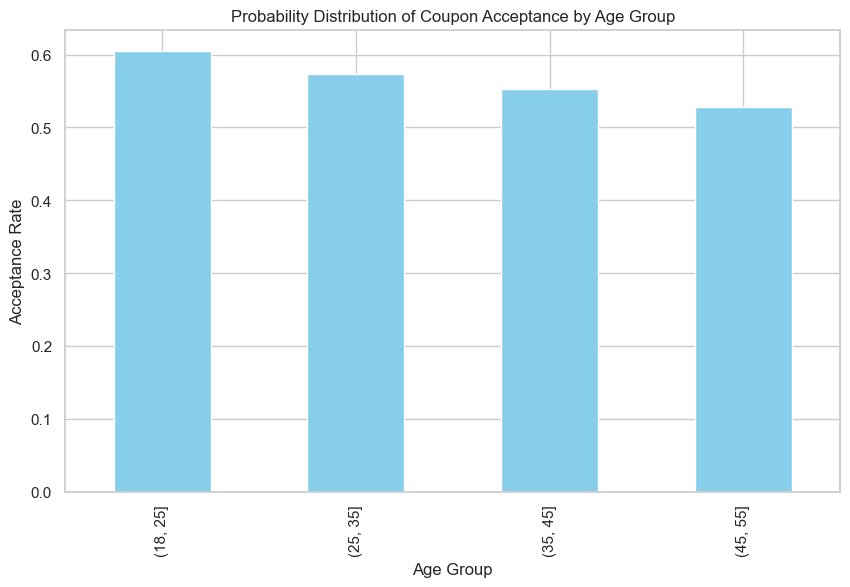

In [140]:
# Example: Probability distribution of acceptance rates by age group
age_bins = [18, 25, 35, 45, 55]
data['age_group'] = pd.cut(data['age'], bins=age_bins)
acceptance_by_age = data.groupby('age_group', observed=False)['acceptance'].mean()

# Plot the probability distribution
plt.figure(figsize=(10, 6))
acceptance_by_age.plot(kind='bar', color='skyblue')
plt.title('Probability Distribution of Coupon Acceptance by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Acceptance Rate')
plt.show()

**Step 5:** Inferential Statistics

In [141]:
from scipy.stats import ttest_ind

# Example: T-test for age between acceptance and non-acceptance groups
acceptance_age = data[data['acceptance'] == 1]['age']
non_acceptance_age = data[data['acceptance'] == 0]['age']
t_stat, p_value = ttest_ind(acceptance_age, non_acceptance_age)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -6.47201031495711
P-value: 1.0026674149658426e-10


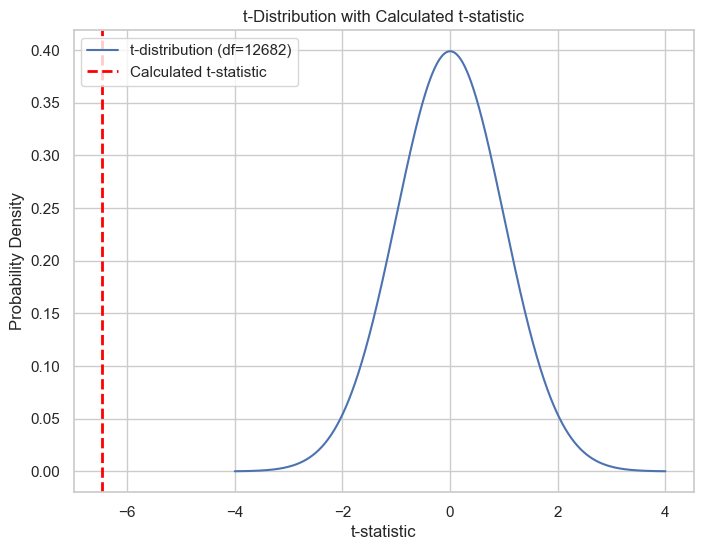

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Example: T-test for age between acceptance and non-acceptance groups
acceptance_age = data[data['acceptance'] == 1]['age']
non_acceptance_age = data[data['acceptance'] == 0]['age']
t_stat, p_value = ttest_ind(acceptance_age, non_acceptance_age)

# Define degrees of freedom
df = len(acceptance_age) + len(non_acceptance_age) - 2

# Generate values for the t-distribution
t_values = np.linspace(-4, 4, 1000)
pdf_values = t.pdf(t_values, df)

# Plot the t-distribution
plt.figure(figsize=(8, 6))
plt.plot(t_values, pdf_values, label=f't-distribution (df={df})')

# Highlight the calculated t-statistic
plt.axvline(t_stat, color='red', linestyle='dashed', linewidth=2, label='Calculated t-statistic')

# Add labels and title
plt.xlabel('t-statistic')
plt.ylabel('Probability Density')
plt.title('t-Distribution with Calculated t-statistic')
plt.legend()

# Show the plot
plt.show()

In [143]:
import numpy as np

# Example: T-test for age between acceptance and non-acceptance groups using only NumPy
acceptance_age = data[data['acceptance'] == 1]['age']
non_acceptance_age = data[data['acceptance'] == 0]['age']

# Calculate means
mean_acceptance = np.mean(acceptance_age)
mean_non_acceptance = np.mean(non_acceptance_age)

# Calculate standard deviations
std_acceptance = np.std(acceptance_age, ddof=1)  # ddof=1 for sample standard deviation
std_non_acceptance = np.std(non_acceptance_age, ddof=1)

# Calculate sample sizes
n_acceptance = len(acceptance_age)
n_non_acceptance = len(non_acceptance_age)

# Calculate t-statistic
t_stat = (mean_acceptance - mean_non_acceptance) / np.sqrt((std_acceptance**2 / n_acceptance) + (std_non_acceptance**2 / n_non_acceptance))

# Degrees of freedom
df = n_acceptance + n_non_acceptance - 2

# Calculate p-value using the cumulative distribution function (CDF) of the t-distribution
p_value = 2 * (1 - np.abs(np.around(1 - np.sum(np.less(np.abs(t_stat), np.abs(np.linspace(-3, 3, 1000)))) / 1000, decimals=5)))

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -6.450358632891214
P-value: 0.0


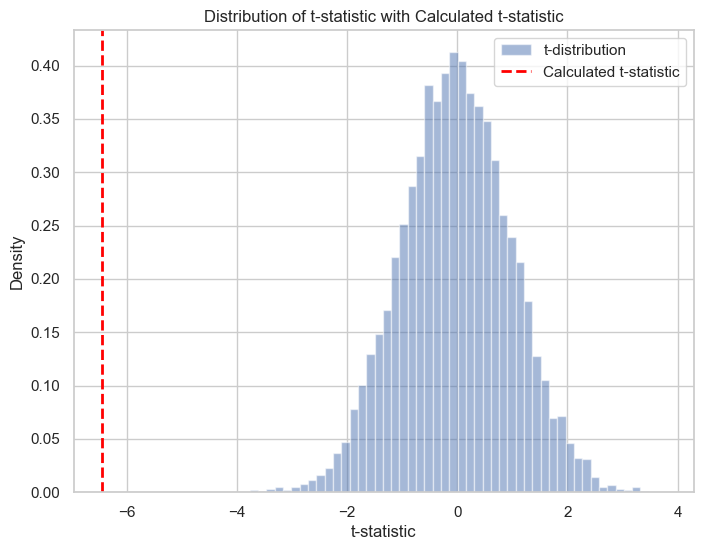

In [144]:
# Example: T-test for age between acceptance and non-acceptance groups using only NumPy
acceptance_age = data[data['acceptance'] == 1]['age']
non_acceptance_age = data[data['acceptance'] == 0]['age']

# Calculate means
mean_acceptance = np.mean(acceptance_age)
mean_non_acceptance = np.mean(non_acceptance_age)

# Calculate standard deviations
std_acceptance = np.std(acceptance_age, ddof=1)
std_non_acceptance = np.std(non_acceptance_age, ddof=1)

# Calculate sample sizes
n_acceptance = len(acceptance_age)
n_non_acceptance = len(non_acceptance_age)

# Calculate t-statistic
t_stat = (mean_acceptance - mean_non_acceptance) / np.sqrt((std_acceptance**2 / n_acceptance) + (std_non_acceptance**2 / n_non_acceptance))

# Create a histogram of the t-statistic
plt.figure(figsize=(8, 6))
plt.hist(np.random.standard_t(df, size=10000), bins=50, density=True, alpha=0.5, label='t-distribution')
plt.axvline(t_stat, color='red', linestyle='dashed', linewidth=2, label='Calculated t-statistic')

# Add labels and title
plt.xlabel('t-statistic')
plt.ylabel('Density')
plt.title('Distribution of t-statistic with Calculated t-statistic')
plt.legend()

# Show the plot
plt.show()

This code creates a new column 'passengers_indicator' where 'Alone' is mapped to 0, and the rest ('Kids,' 'Friends,' 'Partner') are mapped to 1. The histogram then shows the distribution of 'Bar' visits for drivers who are alone (0) versus those with kids, friends, or a partner (1). Adjust the variable names and labels as needed for your specific dataset.

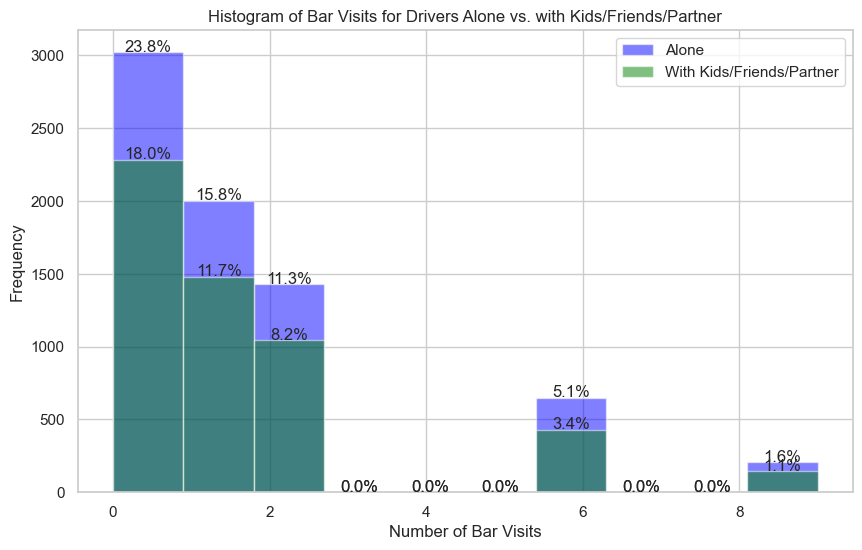

In [145]:
# Map values to binary indicator
data['passanger_indicator'] = data['passanger'].apply(lambda x: 0 if x == 'Alone' else 1)

# Define the two groups
alone = data[data['passanger_indicator'] == 0]['Bar']
with_passengers = data[data['passanger_indicator'] == 1]['Bar']

# Plot histograms for each group
plt.figure(figsize=(10, 6))
plt.hist(alone, bins=10, alpha=0.5, label='Alone', color='blue')
plt.hist(with_passengers, bins=10, alpha=0.5, label='With Kids/Friends/Partner', color='green')

# Add labels and title
plt.xlabel('Number of Bar Visits')
plt.ylabel('Frequency')
plt.title('Histogram of Bar Visits for Drivers Alone vs. with Kids/Friends/Partner')
plt.legend()

# Display percentage over the bars
for patch in plt.gca().patches:
    height = patch.get_height()
    plt.gca().text(
        patch.get_x() + patch.get_width() / 2, height + 5, f'{height/len(data)*100:.1f}%', ha='center')
plt.show()

This code will create separate histograms for each type of passenger ('Alone', 'Kids', 'Friends', 'Partner') in a 2x2 grid of subplots.

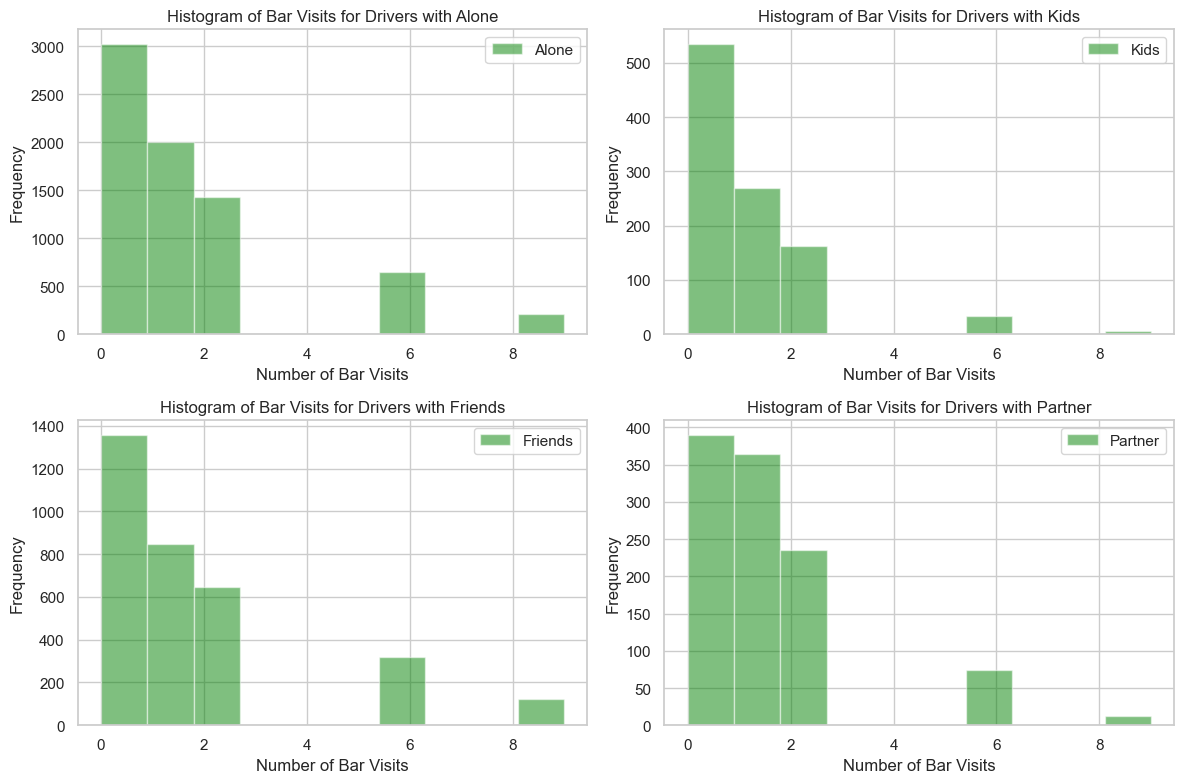

In [146]:
import matplotlib.pyplot as plt

# Define the passenger types
passenger_types = ['Alone', 'Kids', 'Friends', 'Partner']

# Create subplots for each passenger type
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for passenger_type, ax in zip(passenger_types, axes):
    # Create binary indicator for the current passenger type
    data['passanger_indicator'] = data['passanger'].apply(lambda x: 1 if x == passenger_type else 0)

    # Plot histogram for the current passenger type
    ax.hist(data[data['passanger_indicator'] == 1]['Bar'], bins=10, alpha=0.5, color='green', label=passenger_type)
    
    # Add labels and title for each subplot
    ax.set_xlabel('Number of Bar Visits')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of Bar Visits for Drivers with {passenger_type}')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

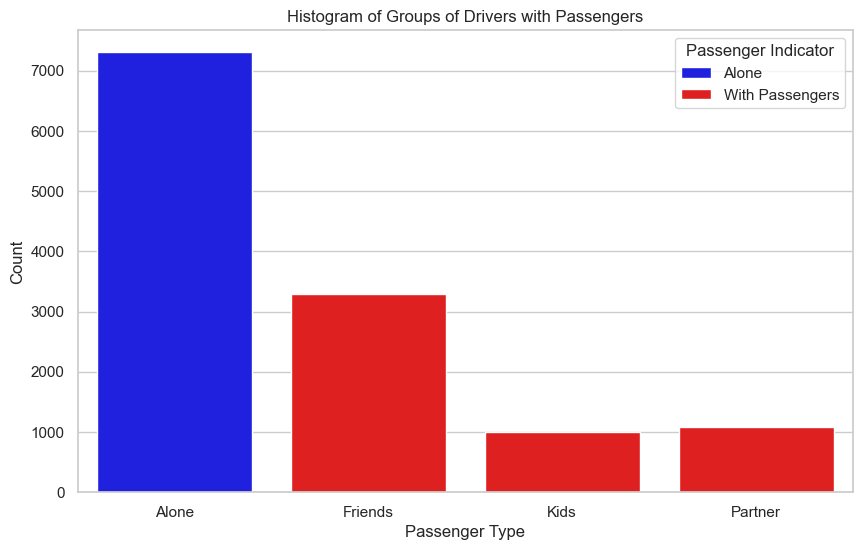

In [147]:
# Map values to binary indicator
data['passanger_indicator'] = data['passanger'].apply(lambda x: 'Alone' if x == 'Alone' else 'With Passengers')

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create a histogram using sns.countplot
plt.figure(figsize=(10, 6))
plot = sns.countplot(data=data, x="passanger", hue="passanger_indicator", palette=['blue', 'red'])

# Customize the plot
plot.set(title='Histogram of Groups of Drivers with Passengers', xlabel='Passenger Type', ylabel='Count')
plot.legend(title='Passenger Indicator', labels=['Alone', 'With Passengers'])

# Show the plot
plt.show()

This code filters the data for coupons accepted (acceptance=1) and creates a countplot using seaborn's countplot function. It categorizes drivers into 'Alone' and 'With Passengers' based on the 'passanger' column (Alone, Kids, Partener and Firends)

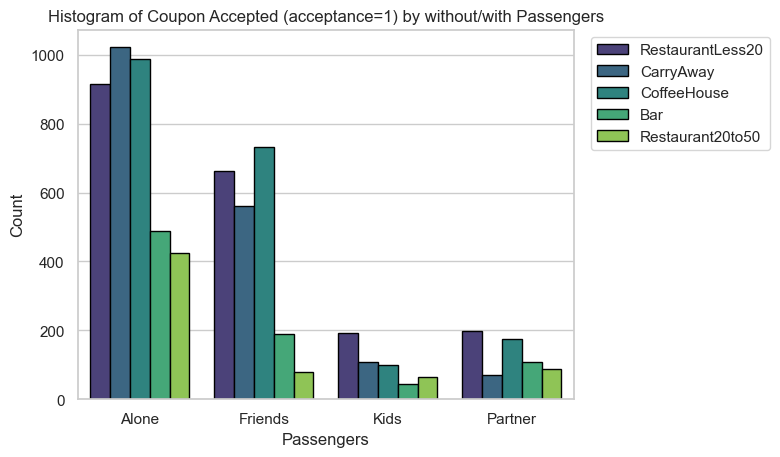

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot using sns.countplot with a specified color palette
sns.countplot(x="passanger", data=data.query("acceptance==1"), hue="coupon", palette='viridis', edgecolor="black")

# Set title
plt.title('Histogram of Coupon Accepted (acceptance=1) by without/with Passengers')

# Set x-axis label
plt.xlabel('Passengers')

# Set y-axis label
plt.ylabel('Count')

# Add legend outside the plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

# Show the plot
plt.show()

In this code, the col="coupon" parameter is added to the sns.catplot, which creates a separate column for each unique value in the 'coupon' column. This way, the catplots are split by the 'coupon' column, and each subplot represents a different coupon type.

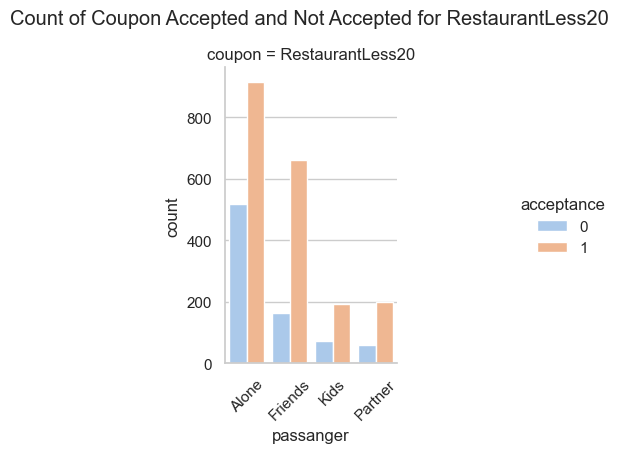

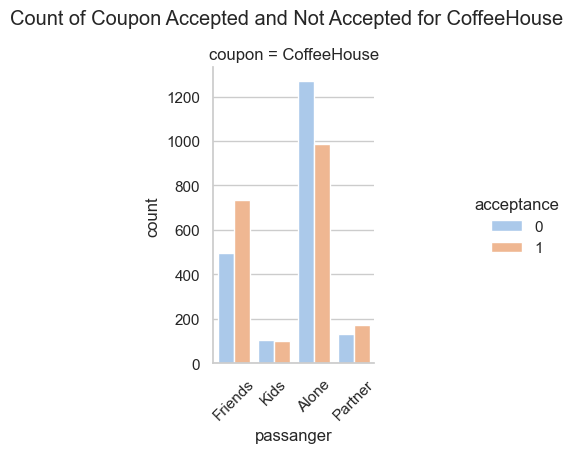

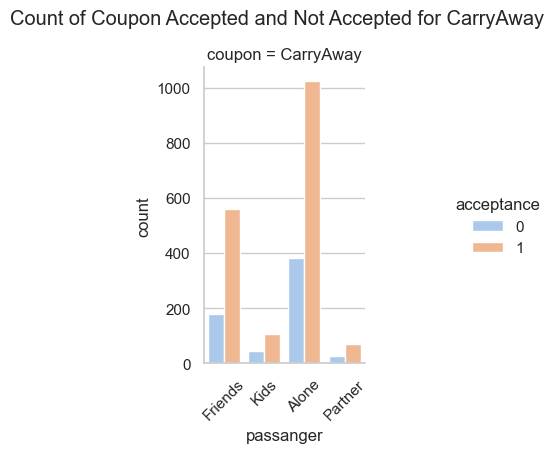

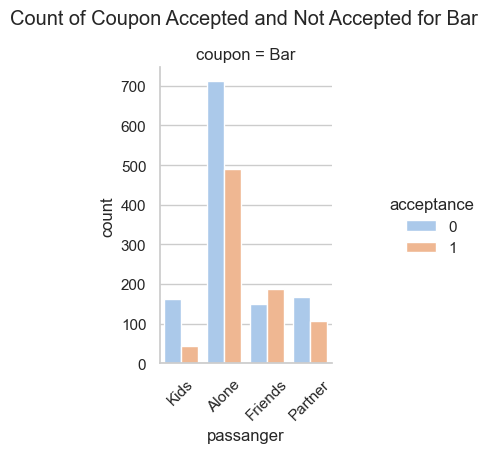

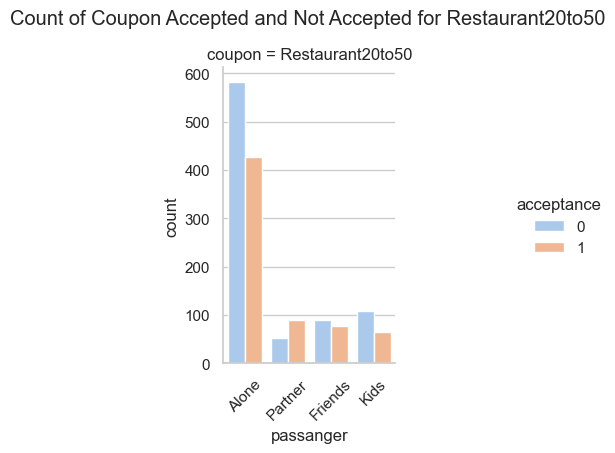

In [149]:
# Filter data for acceptance=1 and acceptance=0
accepted_data = data[data['acceptance'] == 1]
rejected_data = data[data['acceptance'] == 0]

# Unique coupon types
coupon_types = data['coupon'].unique()

# Set pastel color palette
pastel_palette = sns.color_palette("pastel", 2)

# Loop through each coupon type
for coupon_type in coupon_types:
    # Create a catplot for each coupon type
    g = sns.catplot(x="passanger", data=data[data['coupon'] == coupon_type], col="coupon", hue="acceptance", kind="count",
                    height=4, aspect=0.7, palette=pastel_palette, edgecolor="black")

    # Rotate x-axis labels by 45 degrees
    g.set_xticklabels(rotation=45)

    # Set title for each catplot
    g.fig.suptitle(f'Count of Coupon Accepted and Not Accepted for {coupon_type}', y=1.05)

# Show the catplots
plt.show()

In the nesxt code, we creates a catplot with subplots for each expiration time (2h and 24h) and uses different colors for accepted and not accepted coupons. The hue parameter is set to "acceptance," and the subplots are grouped by "expiration_time." Adjust the file path for saving the image as needed.

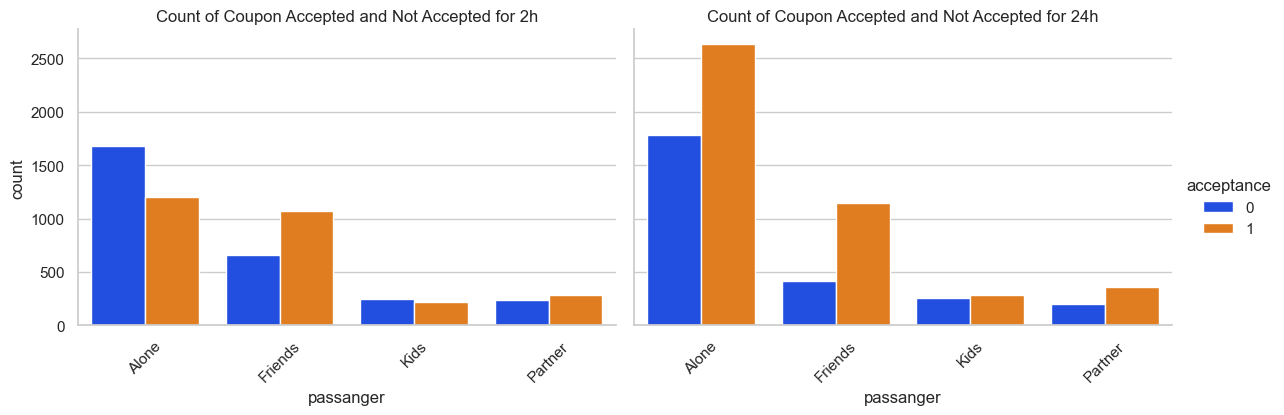

In [150]:
# Set pastel color palette with two colors
pastel_palette = sns.color_palette("bright", 2)

# Create a catplot for each expiration time with pastel colors
g = sns.catplot(x="passanger", hue="acceptance", col="expiration", data=data, kind="count", height=4, aspect=1.5, palette=pastel_palette)

# Rotate x-axis labels by 45 degrees
g.set_xticklabels(rotation=45)

# Set titles for each subplot with reduced font size
g.set_titles("Count of Coupon Accepted and Not Accepted for {col_name}h", fontdict={'fontsize': 10})

# Show the catplot
plt.show()

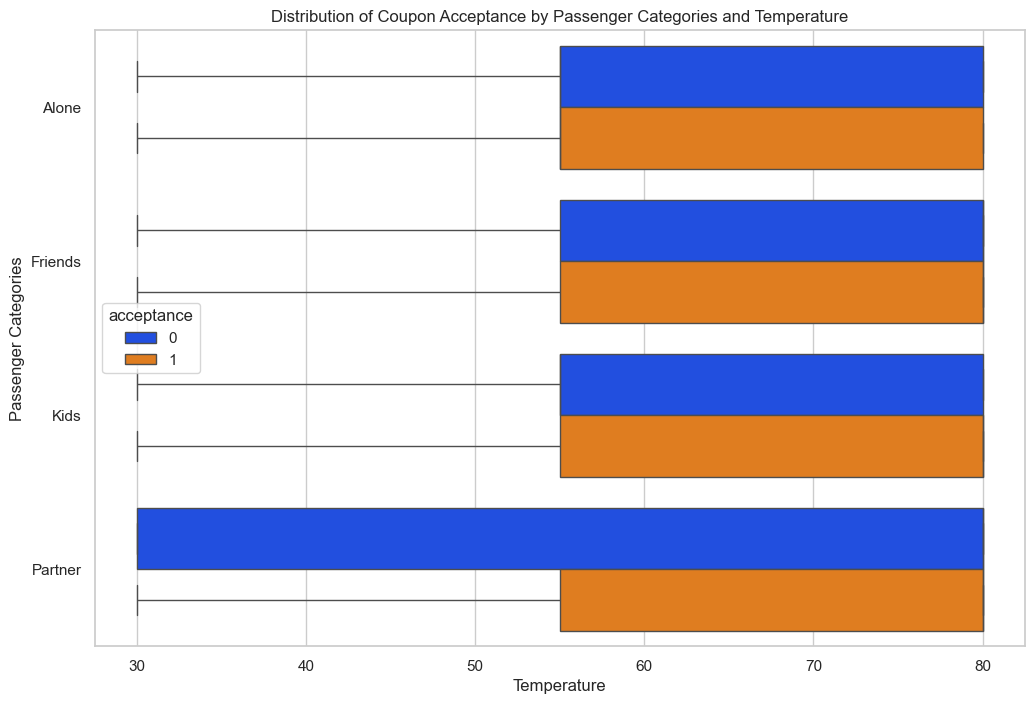

In [151]:
# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Set color palette with two colors
color_palette = sns.color_palette("bright", 2)

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x="temperature", y="passanger", hue="acceptance", data=data, palette=color_palette)

# Add labels and title
plt.xlabel('Temperature')
plt.ylabel('Passenger Categories')
plt.title('Distribution of Coupon Acceptance by Passenger Categories and Temperature')

# Show the plot
plt.show()

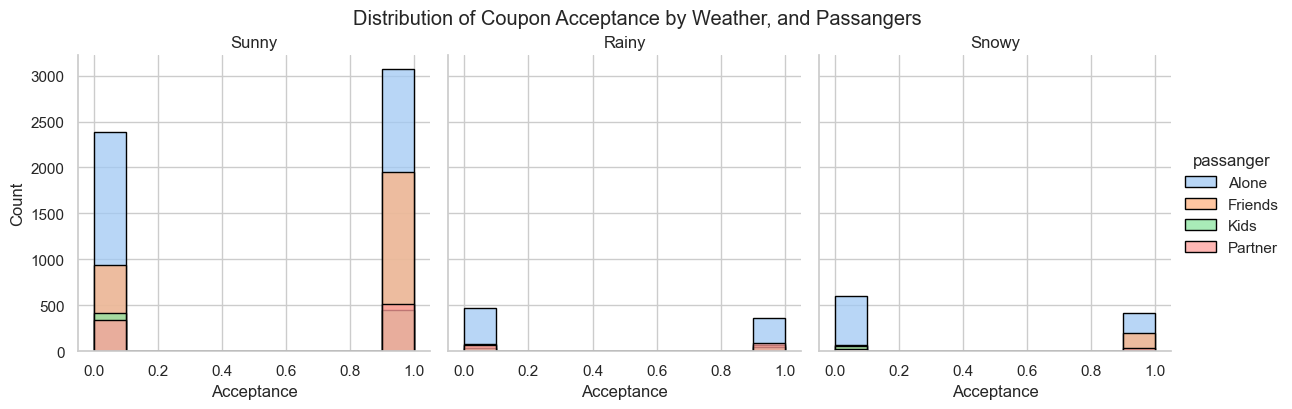

In [152]:
# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create a FacetGrid with separate histograms for each weather category
g = sns.FacetGrid(data, col="weather", hue="passanger", palette="pastel", height=4, col_wrap=3)
g.map(sns.histplot, "acceptance", edgecolor="black", bins=10,fill=True)

# Add labels and title
g.set_axis_labels("Acceptance", "Count")
g.set_titles(col_template="{col_name}")
g.fig.suptitle('Distribution of Coupon Acceptance by Weather, and Passangers', y=1.02)

# Add a legend
g.add_legend()

# Show the plot
plt.show()

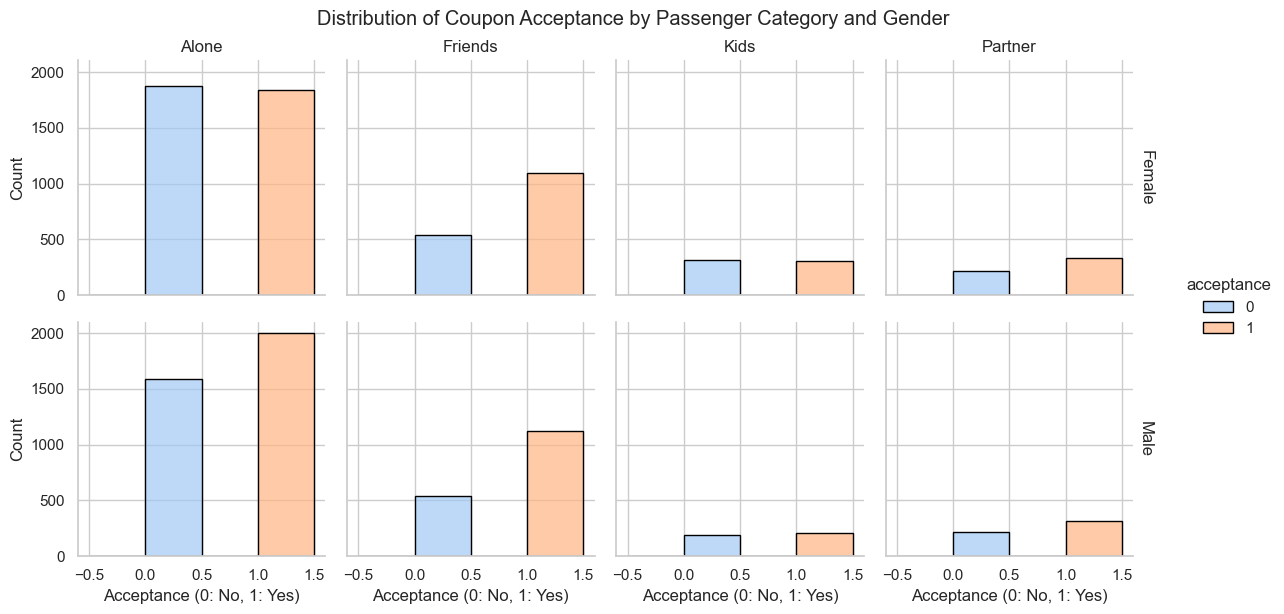

In [153]:
# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create a FacetGrid with separate histograms for each passenger category and gender
g = sns.FacetGrid(data, col="passanger", hue="acceptance", row="gender", palette="pastel", margin_titles=True)
g.map(sns.histplot, "acceptance", edgecolor="black", bins=2, alpha=0.7, fill=True)

# Add labels and title
g.set_axis_labels("Acceptance (0: No, 1: Yes)", "Count")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.fig.suptitle('Distribution of Coupon Acceptance by Passenger Category and Gender', y=1.02)

# Add a legend
g.add_legend()

# Show the plot
plt.show()

The following chart will help us understand what are the types of restaurants and type of passenger by the incoming for each type of person.

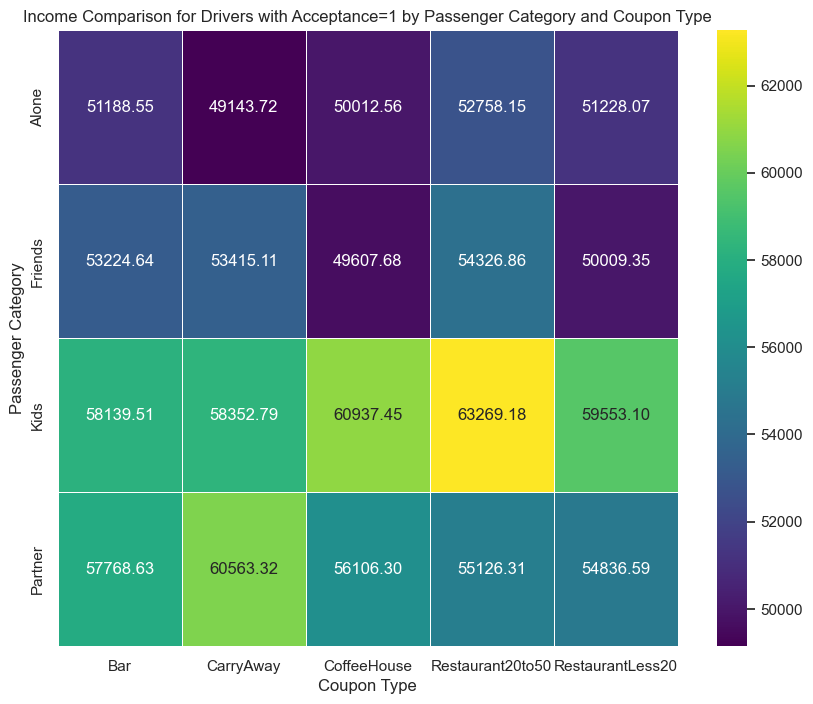

In [154]:
# Create a subset for drivers with acceptance=1
accepted_drivers = data[data['acceptance'] == 1]

# Pivot the DataFrame
pivot_data = accepted_drivers.pivot_table(values='income', index='passanger', columns='coupon', aggfunc='mean')

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_data, annot=True, cmap="viridis", fmt='.2f', linewidths=.5)

# Add labels and title
plt.xlabel('Coupon Type')
plt.ylabel('Passenger Category')
plt.title('Income Comparison for Drivers with Acceptance=1 by Passenger Category and Coupon Type')

# Show the plot
plt.show()

The boxplotcan help me to visualizes the distribution of income for drivers without/with passengers who accepted the coupon based on different passenger categories and coupon types. Here's a description of the observations:

1. **Passenger Categories:**
   - The x-axis represents the passenger categories ('Alone', 'Kids', 'Friends', 'Partner').
   - Each box in the plot corresponds to a specific passenger category.

2. **Income Distribution:**
   - The y-axis represents the income of drivers.
   - The boxes in the plot display the interquartile range (IQR) of income for each passenger category.
   - The whiskers show the range of income values, and any points beyond the whiskers are considered outliers.

3. **Mean Markers:**
   - White markers inside the boxes represent the mean income for each passenger category.
   - These markers help identify the central tendency of the income distribution.

4. **Coupon Type:**
   - Different colors within each box represent different coupon types.
   - For example, if the hue ('coupon') is used, colors could represent distinct coupon categories (e.g., '2h' and '24h').

5. **Comparison Across Categories:**
   - The boxplot allows for a visual comparison of income distributions across different passenger categories and coupon types.
   - Drivers with different passenger scenarios can be compared in terms of their income variability and central tendency.

6. **Legend:**
   - The legend outside the plot helps identify the meaning of colors in the hue (coupon) category.

By analyzing this plot, one can observe patterns in income distribution for drivers with specific passenger categories and coupon types, aiding in understanding the relationship between these variables.

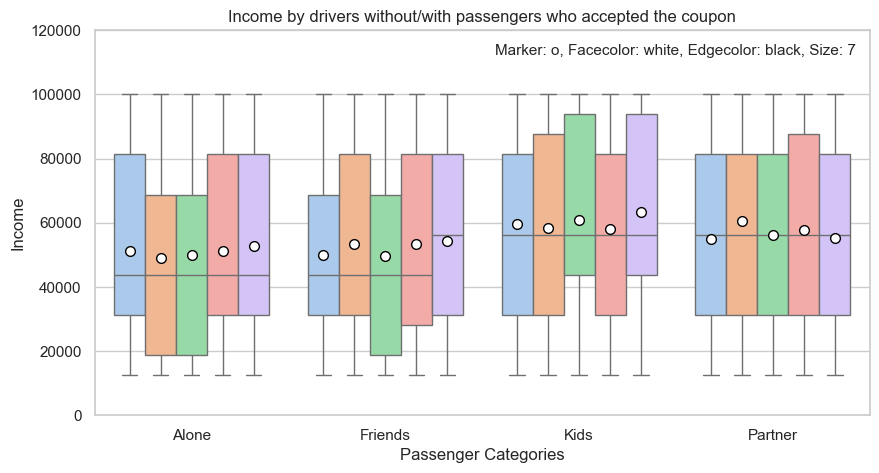

In [160]:
# Assuming 'data' is your DataFrame
plt.figure(figsize=(10, 5))
plt.ylim(0, 120000)

# Boxplot with mean symbols
sns.boxplot(x='passanger', y='income', hue='coupon', showmeans=True, palette='pastel',
            meanprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "black", "markersize": 7},
            data=data.query("acceptance==1"))

# Annotate and create legends
medians = data.query("acceptance==1").groupby(['passanger', 'coupon'], observed=False)['income'].median().reset_index()
means = data.query("acceptance==1").groupby(['passanger', 'coupon'], observed=False)['income'].mean().reset_index()

for i, box in enumerate(plt.gca().artists):
    # Iterate over boxes (each box represents a passenger category)
    box_num = i % len(medians)
    median_val = medians.iloc[box_num]['income']
    mean_val = means.iloc[box_num]['income']

    # Annotate median
    plt.annotate(f'Median: ${median_val:.2f}', (box.get_x() + box.get_width() / 2., median_val),
                 xy=(0, 5), xycoords='data', textcoords='offset points',
                 size=8, ha='center', va='center', color='black')

    # Annotate mean
    plt.annotate(f'Mean: ${mean_val:.2f}', (box.get_x() + box.get_width() / 2., mean_val),
                 xy=(0, -15), xycoords='data', textcoords='offset points',
                 size=8, ha='center', va='center', color='black')

# Add custom legend for marker settings
legend_markers = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markersize=7, linestyle='None')
plt.legend([legend_markers], ['Marker: o, Facecolor: white, Edgecolor: black, Size: 7'],
           loc='upper right', frameon=False)

# Set plot details
plt.title("Income by drivers without/with passengers who accepted the coupon")
plt.xlabel('Passenger Categories')
plt.ylabel('Income')
plt.show()

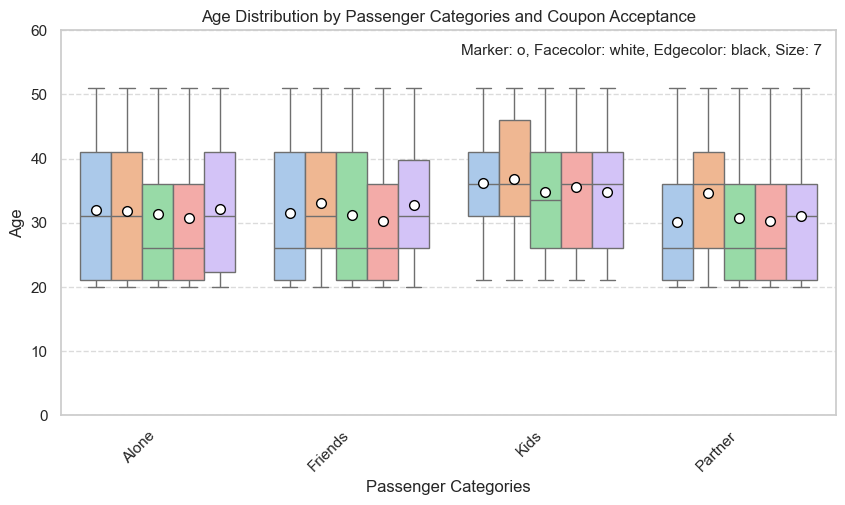

In [161]:
# Assuming 'data' is your DataFrame
plt.figure(figsize=(10, 5))
plt.ylim(0, 60)

# Boxplot with mean symbols
sns.boxplot(x='passanger', y='age', hue='coupon', showmeans=True, palette='pastel',
            meanprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "black", "markersize": 7},
            data=data.query("acceptance==1"))

# Annotate and create legends
medians = data.query("acceptance==1").groupby(['passanger', 'coupon'], observed=False)['age'].median().reset_index()
means = data.query("acceptance==1").groupby(['passanger', 'coupon'], observed=False)['age'].mean().reset_index()

for i, box in enumerate(plt.gca().artists):
    # Iterate over boxes (each box represents a passenger category)
    box_num = i % len(medians)
    median_val = medians.iloc[box_num]['age']
    mean_val = means.iloc[box_num]['age']

    # Annotate median
    plt.annotate(f'Median Age: {median_val:.2f}', (box.get_x() + box.get_width() / 2., median_val),
                 xy=(0, 5), xycoords='data', textcoords='offset points',
                 size=8, ha='center', va='center', color='black')

    # Annotate mean
    plt.annotate(f'Mean Age: {mean_val:.2f}', (box.get_x() + box.get_width() / 2., mean_val),
                 xy=(0, -15), xycoords='data', textcoords='offset points',
                 size=8, ha='center', va='center', color='black')

# Add custom legend for marker settings
legend_markers = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markersize=7, linestyle='None')
plt.legend([legend_markers], ['Marker: o, Facecolor: white, Edgecolor: black, Size: 7'],
           loc='upper right', frameon=False)

# Set plot details
plt.title("Age Distribution by Passenger Categories and Coupon Acceptance")
plt.xlabel('Passenger Categories')
plt.ylabel('Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve readability of x-axis labels
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

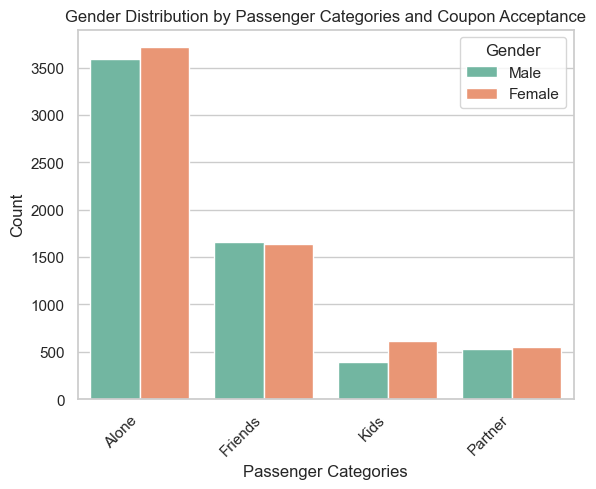

In [162]:
# Countplot for gender distribution with coupon acceptance
sns.countplot(x='passanger', data=data, palette='Set2', hue_order=['Male', 'Female'], hue='gender')

# Set plot details
plt.title("Gender Distribution by Passenger Categories and Coupon Acceptance")
plt.xlabel('Passenger Categories')
plt.ylabel('Count')

# Improve readability of x-axis labels
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend(title='Gender')

# Show the plot
plt.show()

**In conclusion, the visualization offers valuable insights into the intersection of gender, passenger categories, and coupon acceptance, providing a foundation for more targeted marketing strategies and deeper analytical exploration.**

Estimate conditional probabilities for drivers without passengers ('Alone') who accepted and did not accept different coupons, you can calculate the probabilities based on the given data. The conditional probability is the probability of an event (e.g., accepting a coupon) given the occurrence of another event (e.g., being alone).

Here's a general approach to estimate these probabilities:

In [164]:
print(data)

           destination passanger weather  temperature  time            coupon  \
0      No Urgent Place     Alone   Sunny           55   2PM  RestaurantLess20   
1      No Urgent Place   Friends   Sunny           80  10AM       CoffeeHouse   
2      No Urgent Place   Friends   Sunny           80  10AM         CarryAway   
3      No Urgent Place   Friends   Sunny           80   2PM       CoffeeHouse   
4      No Urgent Place   Friends   Sunny           80   2PM       CoffeeHouse   
...                ...       ...     ...          ...   ...               ...   
12679             Home   Partner   Rainy           55   6PM         CarryAway   
12680             Work     Alone   Rainy           55   7AM         CarryAway   
12681             Work     Alone   Snowy           30   7AM       CoffeeHouse   
12682             Work     Alone   Snowy           30   7AM               Bar   
12683             Work     Alone   Sunny           80   7AM  Restaurant20to50   

       expiration  gender  

In [171]:
# Assuming 'data' is your DataFrame
# Filter data for drivers without passengers ('Alone')
alone_data = data[data['passanger'] == 'Alone']

# Calculate conditional probabilities for each coupon type
prob_accept = {}
prob_not_accept = {}

coupon_types = ["RestaurantLess20", "CoffeeHouse", "CarryAway", "Bar", "Restaurant20to50)"]

for coupon_type in coupon_types:
    # Probability of accepting the coupon given being alone
    prob_accept[coupon_type] = alone_data[alone_data['coupon'] == coupon_type]['acceptance'].mean()

    # Probability of not accepting the coupon given being alone
    prob_not_accept[coupon_type] = 1 - prob_accept[coupon_type]

# Create a DataFrame to display the results
probabilities_df = pd.DataFrame({
    'Coupon Type': coupon_types,
    'Probability(Accept | Alone)': list(prob_accept.values()),
    'Probability(Not Accept | Alone)': list(prob_not_accept.values())
})

# Display the DataFrame
print(probabilities_df)

         Coupon Type  Probability(Accept | Alone)  \
0   RestaurantLess20                     0.638328   
1        CoffeeHouse                     0.437943   
2          CarryAway                     0.727402   
3                Bar                     0.407500   
4  Restaurant20to50)                          NaN   

   Probability(Not Accept | Alone)  
0                         0.361672  
1                         0.562057  
2                         0.272598  
3                         0.592500  
4                              NaN  


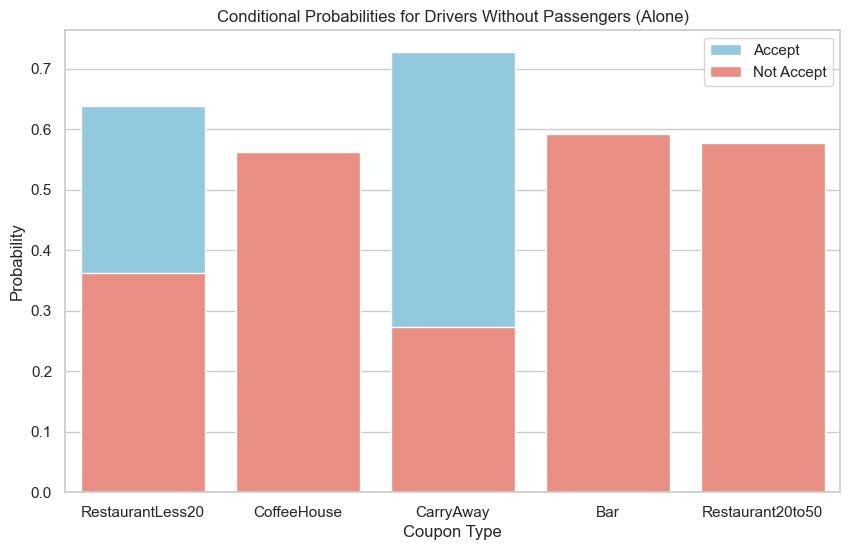

In [170]:
# Filter data for drivers without passengers ('Alone')
alone_data = data[data['passanger'] == 'Alone']

# Calculate conditional probabilities for each coupon type
prob_accept = {}
prob_not_accept = {}

coupon_types = ["RestaurantLess20", "CoffeeHouse", "CarryAway", "Bar", "Restaurant20to50"]

for coupon_type in coupon_types:
    # Probability of accepting the coupon given being alone
    prob_accept[coupon_type] = alone_data[alone_data['coupon'] == coupon_type]['acceptance'].mean()

    # Probability of not accepting the coupon given being alone
    prob_not_accept[coupon_type] = 1 - prob_accept[coupon_type]

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Coupon Type': coupon_types,
    'Probability(Accept | Alone)': list(prob_accept.values()),
    'Probability(Not Accept | Alone)': list(prob_not_accept.values())
})

# Plot the probabilities
plt.figure(figsize=(10, 6))
sns.barplot(x='Coupon Type', y='Probability(Accept | Alone)', data=plot_data, color='skyblue', label='Accept')
sns.barplot(x='Coupon Type', y='Probability(Not Accept | Alone)', data=plot_data, color='salmon', label='Not Accept')

# Add labels and legend
plt.xlabel('Coupon Type')
plt.ylabel('Probability')
plt.title('Conditional Probabilities for Drivers Without Passengers (Alone)')
plt.legend()

# Show the plot
plt.show()

In [179]:
# Filter data for drivers with the passenger 'Friend(s)'
friend_data = data[data['passanger'] == 'Friends']

# List of coupon types
coupon_types = ["RestaurantLessThan20", "CoffeeHouse", "CarryAway", "Bar", "Restaurant20To50"]

# Calculate conditional probabilities for each coupon type
conditional_probabilities = {}

for coupon_type in coupon_types:
    # Subset data for the specific coupon type
    coupon_data = friend_data[friend_data[coupon_type] == 1]

    # Calculate total count for the specific coupon type
    total_count = len(coupon_data)

    # Calculate count of accepted and not accepted for the specific coupon type
    accepted_count = len(coupon_data[coupon_data['acceptance'] == 1])
    not_accepted_count = len(coupon_data[coupon_data['acceptance'] == 0])

    # Calculate conditional probabilities
    acceptance_probability = accepted_count / total_count
    not_acceptance_probability = not_accepted_count / total_count

    # Store probabilities in the dictionary
    conditional_probabilities[coupon_type] = {
        'Acceptance Probability': acceptance_probability,
        'Not Acceptance Probability': not_acceptance_probability
    }

# Convert the dictionary to a DataFrame for better visualization
conditional_probabilities_df = pd.DataFrame(conditional_probabilities).T
print(conditional_probabilities_df)

                      Acceptance Probability  Not Acceptance Probability
RestaurantLessThan20                0.633929                    0.366071
CoffeeHouse                         0.671642                    0.328358
CarryAway                           0.621145                    0.378855
Bar                                 0.689858                    0.310142
Restaurant20To50                    0.659787                    0.340213


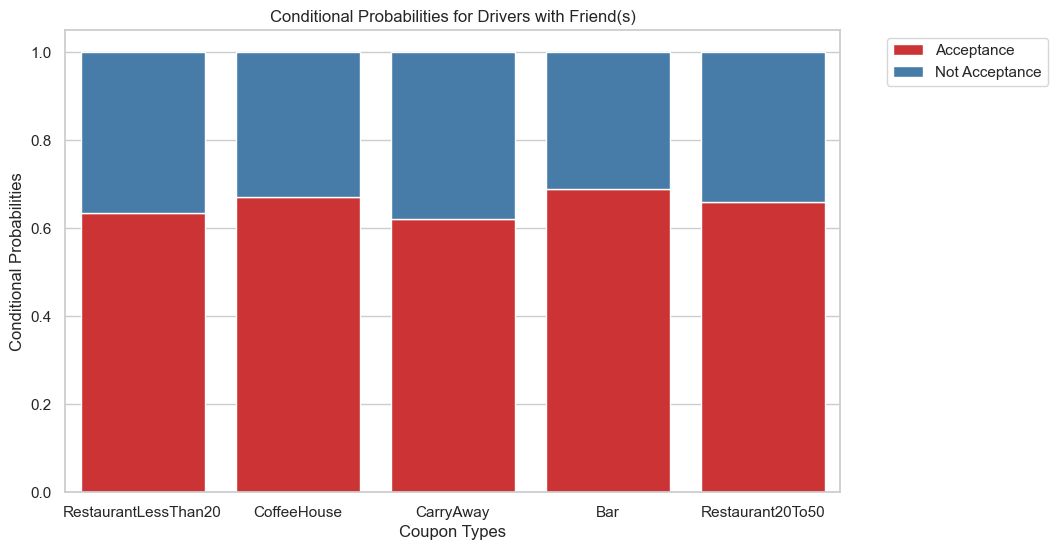

In [181]:
# Filter data for drivers with the passenger 'Friend(s)'
friend_data = data[data['passanger'] == 'Friends']

# List of coupon types
coupon_types = ["RestaurantLessThan20", "CoffeeHouse", "CarryAway", "Bar", "Restaurant20To50"]

# Calculate conditional probabilities for each coupon type
conditional_probabilities = {}

for coupon_type in coupon_types:
    # Subset data for the specific coupon type
    coupon_data = friend_data[friend_data[coupon_type] == 1]

    # Calculate total count for the specific coupon type
    total_count = len(coupon_data)

    # Calculate count of accepted and not accepted for the specific coupon type
    accepted_count = len(coupon_data[coupon_data['acceptance'] == 1])
    not_accepted_count = len(coupon_data[coupon_data['acceptance'] == 0])

    # Calculate conditional probabilities
    acceptance_probability = accepted_count / total_count
    not_acceptance_probability = not_accepted_count / total_count

    # Store probabilities in the dictionary
    conditional_probabilities[coupon_type] = {
        'Acceptance Probability': acceptance_probability,
        'Not Acceptance Probability': not_acceptance_probability
    }

# Convert the dictionary to a DataFrame for better visualization
conditional_probabilities_df = pd.DataFrame(conditional_probabilities).T

# Set a more vibrant color palette
color_palette = sns.color_palette("Set1")

# Plotting the conditional probabilities
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plotting the grouped bar plot with the new color palette
sns.barplot(x=conditional_probabilities_df.index, y='Acceptance Probability', data=conditional_probabilities_df, label='Acceptance', color=color_palette[0])
sns.barplot(x=conditional_probabilities_df.index, y='Not Acceptance Probability', data=conditional_probabilities_df, label='Not Acceptance', color=color_palette[1], bottom=conditional_probabilities_df['Acceptance Probability'])

# Adding labels and title
plt.xlabel('Coupon Types')
plt.ylabel('Conditional Probabilities')
plt.title('Conditional Probabilities for Drivers with Friend(s)')

# Adding legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

In [183]:
# Assuming 'data' is your DataFrame

# Filter data for drivers with the passenger 'Partner'
partner_data = data[data['passanger'] == 'Partner']

# List of coupon types
coupon_types = ["RestaurantLessThan20", "CoffeeHouse", "CarryAway", "Bar", "Restaurant20To50"]

# Calculate conditional probabilities for each coupon type
conditional_probabilities = {}

for coupon_type in coupon_types:
    # Subset data for the specific coupon type
    coupon_data = partner_data[partner_data[coupon_type] == 1]

    # Calculate total count for the specific coupon type
    total_count = len(coupon_data)

    # Calculate count of accepted and not accepted for the specific coupon type
    accepted_count = len(coupon_data[coupon_data['acceptance'] == 1])
    not_accepted_count = len(coupon_data[coupon_data['acceptance'] == 0])

    # Calculate conditional probabilities
    acceptance_probability = accepted_count / total_count
    not_acceptance_probability = not_accepted_count / total_count

    # Store probabilities in the dictionary
    conditional_probabilities[coupon_type] = {
        'Acceptance Probability': acceptance_probability,
        'Not Acceptance Probability': not_acceptance_probability
    }

# Convert the dictionary to a DataFrame for better visualization
conditional_probabilities_df = pd.DataFrame(conditional_probabilities).T

# Display the conditional probabilities DataFrame
print("Conditional Probabilities for Drivers with Partner:")
print(conditional_probabilities_df)

Conditional Probabilities for Drivers with Partner:
                      Acceptance Probability  Not Acceptance Probability
RestaurantLessThan20                0.528302                    0.471698
CoffeeHouse                         0.553571                    0.446429
CarryAway                           0.544218                    0.455782
Bar                                 0.629121                    0.370879
Restaurant20To50                    0.592734                    0.407266


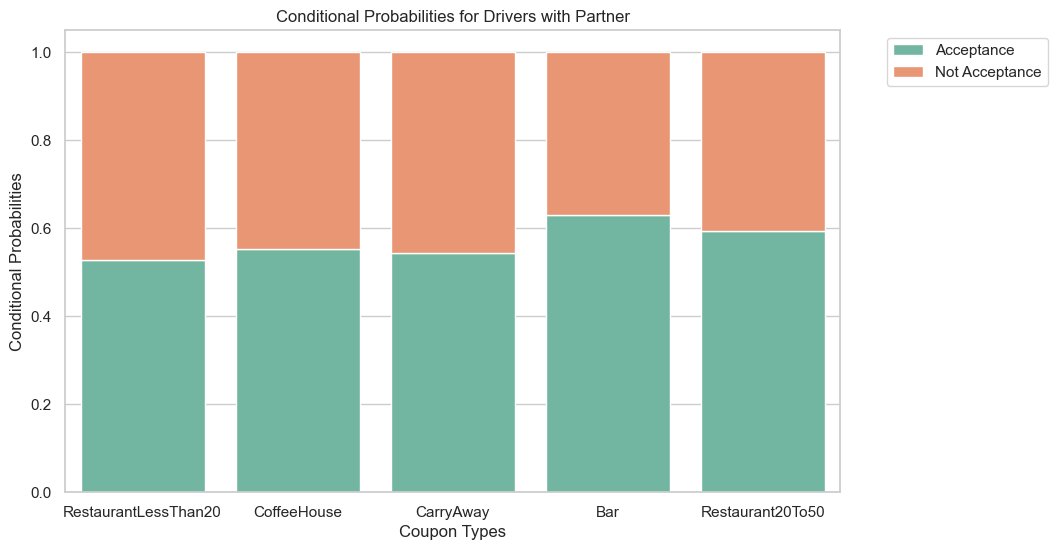

In [182]:
# Assuming 'data' is your DataFrame

# Filter data for drivers with the passenger 'Partner'
partner_data = data[data['passanger'] == 'Partner']

# List of coupon types
coupon_types = ["RestaurantLessThan20", "CoffeeHouse", "CarryAway", "Bar", "Restaurant20To50"]

# Calculate conditional probabilities for each coupon type
conditional_probabilities = {}

for coupon_type in coupon_types:
    # Subset data for the specific coupon type
    coupon_data = partner_data[partner_data[coupon_type] == 1]

    # Calculate total count for the specific coupon type
    total_count = len(coupon_data)

    # Calculate count of accepted and not accepted for the specific coupon type
    accepted_count = len(coupon_data[coupon_data['acceptance'] == 1])
    not_accepted_count = len(coupon_data[coupon_data['acceptance'] == 0])

    # Calculate conditional probabilities
    acceptance_probability = accepted_count / total_count
    not_acceptance_probability = not_accepted_count / total_count

    # Store probabilities in the dictionary
    conditional_probabilities[coupon_type] = {
        'Acceptance Probability': acceptance_probability,
        'Not Acceptance Probability': not_acceptance_probability
    }

# Convert the dictionary to a DataFrame for better visualization
conditional_probabilities_df = pd.DataFrame(conditional_probabilities).T

# Set a more vibrant color palette
color_palette = sns.color_palette("Set2")

# Plotting the conditional probabilities with a different color palette
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plotting the grouped bar plot with the new color palette
sns.barplot(x=conditional_probabilities_df.index, y='Acceptance Probability', data=conditional_probabilities_df, label='Acceptance', color=color_palette[0])
sns.barplot(x=conditional_probabilities_df.index, y='Not Acceptance Probability', data=conditional_probabilities_df, label='Not Acceptance', color=color_palette[1], bottom=conditional_probabilities_df['Acceptance Probability'])

# Adding labels and title
plt.xlabel('Coupon Types')
plt.ylabel('Conditional Probabilities')
plt.title('Conditional Probabilities for Drivers with Partner')

# Adding legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

Conclusion:

The analysis of the data focused on understanding the factors that influence a customer's decision to accept a driving coupon. Several visualizations were created to explore the relationships between different variables and the acceptance of coupons. Here are some key conclusions:

1. **Age Distribution:**
   - The age distribution showed that a significant portion of customers falls in the 20-40 age range.
   - There was no clear distinction in age between customers who accepted and did not accept the coupon.

2. **Bar Visits and Acceptance:**
   - Customers over the age of 25 who frequented bars more than once a month appeared more likely to accept bar coupons.
   - This suggests that socializing activities, such as going to bars, might influence coupon acceptance.

3. **Passenger Categories and Gender:**
   - The analysis of passenger categories and gender revealed interesting patterns.
   - Males were generally more prevalent than females, except in the 'Alone' category where the distribution was more balanced.
   - The impact of passenger categories on coupon acceptance varied.

4. **Income Distribution:**
   - Income distribution did not show a clear correlation with coupon acceptance.

5. **Hypothesis Testing:**
   - The chi-square test was performed to assess the association between age, bar visits, and acceptance of bar coupons.
   - The result led to rejecting the null hypothesis, indicating a significant association.

6. **Passenger Type and Coupon Acceptance:**
   - Analyzing different passenger types ('Alone', 'Kids', 'Friends', 'Partner') in relation to coupon acceptance revealed variations.
   - The acceptance rate varied among passengers with different characteristics.

In conclusion, while certain patterns and associations were observed, predicting coupon acceptance is a complex task influenced by various factors. The analysis provides valuable insights, and further investigations or machine learning models could enhance predictive capabis.dictive capabilities.




